Import statements, place any extra import statements below.

In [1]:
from core import *

Initialize the Orchestrator class.

In [2]:
orchestrator = Orchestrator()

Enter the name of the category of interest.

In [3]:
orchestrator.category_name()

Text(value='', description='Category:', placeholder='')

Button(description='Submit', style=ButtonStyle())

get_ed_directories() returns a dictionary of directories.
Here is an explanation of this data structure: 
1. The directories object is a list of directories (each of them a dictionary).
2. Each directory in directories, contains a dictionary of data set objects (these are themselves dictionaries).
3. Each data set "object" in each directory contains a dataset key that maps to a dictionary of the following form: {json sample of data KEY: json sample of data VALUE, json of metadata of the data set KEY: json of metadata of the data set VALUE}.

This defines a nested dictionary.

Here is an example:
```python
ed_directories = 
    [
     {"dataset00": 
        {"sample_dataset00" : json object, "md_dataset00": json object},
      "dataset01": 
        {"sample_dataset01" : json object, "md_dataset01": json object},
      ...
     },
     {"dataset10": 
        {"sample_dataset10" : json object, "md_dataset10": json object},
      "dataset01": 
        {"sample_dataset11" : json object, "md_dataset10": json object},
      ...
      },
     {"datasetN0": 
        {"sample_datasetN0" : json object, "md_datasetN0": json object},
      "datasetN-1": 
        {"sample_datasetN1" : json object, "md_datasetN1": json object},
      ...
     }
    ]
```

In [4]:
orchestrator.get_ed_directories()

[]

To save directories, use the cell below.

In [5]:
ed_directories = orchestrator.get_ed_directories()

To access a directory in ed_directories, uncomment the cell below:

In [6]:
# directory_index = ...
# ed_directory = orchestrator.get_ed_directory(directory_index)

# or ed_directory = ed_directories[directory_index]

To access datasets of ed_directories, uncomment the cell below::

In [7]:
# list_of_datasets_of_ed_directory = orchestrator.get_datasets(directory_index)

# or ed_directory.keys()

To get a dataframe of a sample dataset, uncomment the cell below:

In [8]:
# dataset_index = ...
# dataset_key = list_of_datasets_of_ed_directory[dataset_index]
# dataset_dataframe = orchestrator.get_dataset(directory, dataset_key)

# This is NOT the cleanest way to do this, but this is another way:
# or ed_directory = self.ed_directories[directory_index]
# dataset = ed_directory.get(dataset_key)
# key = dataset.keys()[0]
# df = pd.read_json(dataset.get(key))

Now that you are able to parse through ed_directories, you can use datasets to visualize the data.

Depending on the plot of choice:
- Histogram (generates histogram):index of directory (one), key of dataset (one), column name of the corresponding directory (one).
- Scatter (generates scatter plot): index of directory (one), key of dataset (one, column names of the corresponding directory (two).
- Compare Using Scatter (generates a scatter plot of two data sets using common columns in them): indices of directories (two), key of datasets (two), column names of the corresponding directory (two).
- Describe (generates a summary of one dataset): index of directory (one), key of dataset (one).
- Compare Using Columns (generates a summary of two datasets using specific columns): index of directories (two), key of datasets (two), column name of each column for corresponding dataframe (two, one for each).



In [9]:
orchestrator.visualization_parameters()

RadioButtons(description='Method:', options=('histogram', 'scatter', 'compare using scatter', 'describe', 'compare using columns and describe'), value='histogram')

Text(value='', description='Directory 1:', placeholder='')

Text(value='', description='Directory 2:', placeholder='')

Text(value='', description='Dataset 1:', placeholder='')

Text(value='', description='Dataset 2:', placeholder='')

Text(value='', description='Column 1:', placeholder='')

Text(value='', description='Column 2:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Run this cell to visualize using the parameters above.

In [10]:
orchestrator.visualize()

Testing Visualizations

In [11]:
df1 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df1.head()

,A,B,C,D
0,0.951264,-1.241145,0.349568,-0.159907
1,-0.591188,1.037855,0.085882,-0.953467
2,0.066767,-1.101216,-0.912255,0.286653
3,0.748084,-0.848871,2.323386,1.050524
4,0.129510,0.193595,0.754899,0.176772


In [12]:
EDComponent = EDComponent()

In [13]:
EDComponent.histogram(df1, 'A')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c8e6cc0>]],
      dtype=object)

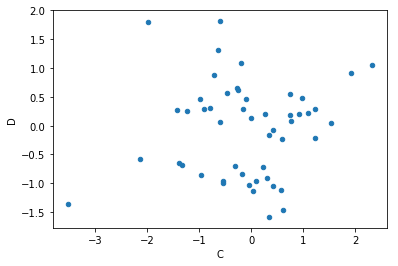

In [14]:
EDComponent.scatter(df1, 'C', 'D')

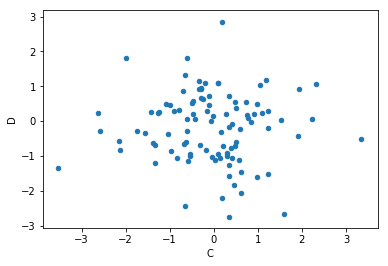

In [15]:
EDComponent.scatter_compare(df1, df2, 'C', 'D')

In [16]:
EDComponent.statistics(df1, df2)

(               A          B          C          D
 count  50.000000  50.000000  50.000000  50.000000
 mean   -0.160515   0.130969  -0.091886  -0.056047
 std     0.858776   1.172250   1.059713   0.825478
 min    -2.587831  -2.244103  -3.523179  -1.590060
 25%    -0.678308  -0.584588  -0.635689  -0.807095
 50%    -0.099030   0.135367  -0.066768   0.109745
 75%     0.480107   1.013103   0.582371   0.468082
 max     1.988120   2.826010   2.323386   1.816149,
                A          B          C          D
 count  50.000000  50.000000  50.000000  50.000000
 mean   -0.055618   0.156837  -0.042010  -0.310221
 std     0.840291   1.107669   1.133782   1.141704
 min    -2.114686  -2.329010  -2.635568  -2.741592
 25%    -0.503671  -0.773257  -0.619632  -1.053066
 50%    -0.018705   0.209751   0.095749  -0.300920
 75%     0.550756   1.036382   0.480621   0.503072
 max     1.657551   2.089676   3.332923   2.853978)

In [17]:
EDComponent.statistics_columns(df1, df2, 'A', 'B')

(count    50.000000
 mean     -0.160515
 std       0.858776
 min      -2.587831
 25%      -0.678308
 50%      -0.099030
 75%       0.480107
 max       1.988120
 Name: A, dtype: float64, count    50.000000
 mean      0.156837
 std       1.107669
 min      -2.329010
 25%      -0.773257
 50%       0.209751
 75%       1.036382
 max       2.089676
 Name: B, dtype: float64)